## Car Price Prediction Project

### Data Loading:

In [1]:
#Import modules and libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
#Import all datasets
audi = pd.read_csv("audi.csv")
bmw = pd.read_csv("bmw.csv")
cclass = pd.read_csv("cclass.csv")
focus = pd.read_csv("focus.csv")
ford = pd.read_csv("ford.csv")
hyundai = pd.read_csv("hyundi.csv")
merc = pd.read_csv("merc.csv")
skoda = pd.read_csv("skoda.csv")
toyota = pd.read_csv("toyota.csv")
vauxhall = pd.read_csv("vauxhall.csv")
vw = pd.read_csv("vw.csv")


In [3]:
#Concatenate all datasets
cars = pd.concat([audi, bmw, cclass, focus, ford, hyundai, merc, skoda, toyota, vauxhall, vw])

In [4]:
#Print information of dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108540 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 9.1+ MB


In [5]:
#Number of rows and columns
cars.shape

(108540, 10)

### Data Cleansing:

In [6]:
#Drop unwanted columns
cars = cars.drop(columns=['tax(£)','tax','mpg'])

In [7]:
#Describe dataset
cars.describe()

,year,price,mileage,engineSize
count,108540.000000,108540.000000,108540.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,1.661644
std,2.130057,9756.266820,21176.423684,0.557058
min,1970.000000,450.000000,1.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,1.200000
50%,2017.000000,14698.000000,17265.000000,1.600000
75%,2019.000000,20940.000000,32236.000000,2.000000
max,2060.000000,159999.000000,323000.000000,6.600000


In [8]:
#Display empty cells
cars.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
dtype: int64

In [9]:
#Display column datatypes
cars.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
engineSize      float64
dtype: object

In [11]:
#Drop rows that have engine sizes = 0 
cars2 = cars[cars['engineSize'] > 0.0]

In [12]:
#Display dataframe
cars2

,model,year,price,transmission,mileage,fuelType,engineSize
0,A1,2017,12500,Manual,15735,Petrol,1.4
1,A6,2016,16500,Automatic,36203,Diesel,2.0
2,A1,2016,11000,Manual,29946,Petrol,1.4
3,A4,2017,16800,Automatic,25952,Diesel,2.0
4,A3,2019,17300,Manual,1998,Petrol,1.0
...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,1.2


In [13]:
#Print all fuel types
cars2['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [14]:
#Display column dtypes
cars2.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
engineSize      float64
dtype: object

In [ ]:
#Create new column "today" and set all values to "2023"
cars2['today'] = '2023'

In [ ]:
#Convert "today" column datatype to integer
cars2['today'] = cars2['today'].astype(int)

In [17]:
#Print dataset
cars2

,model,year,price,transmission,mileage,fuelType,engineSize,today
0,A1,2017,12500,Manual,15735,Petrol,1.4,2023
1,A6,2016,16500,Automatic,36203,Diesel,2.0,2023
2,A1,2016,11000,Manual,29946,Petrol,1.4,2023
3,A4,2017,16800,Automatic,25952,Diesel,2.0,2023
4,A3,2019,17300,Manual,1998,Petrol,1.0,2023
...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,2.0,2023
15153,Fox,2008,1799,Manual,88102,Petrol,1.2,2023
15154,Fox,2009,1590,Manual,70000,Petrol,1.4,2023
15155,Fox,2006,1250,Manual,82704,Petrol,1.2,2023


In [ ]:
#Create "age" column displaying the ages of vehicles by subtracting "today" values from "year"
cars2['age'] = cars2.apply(lambda x: x['today'] - x['year'], axis=1)

In [19]:
#Drop unwanted "year" and "today" columns
cars2 = cars2.drop(columns=['year', 'today'])

## Price Prediction

### Data Preparation:

In [20]:
#One hot encoding: Converting categorical values into indicator values
#Set values to "fuel_data" dataframe
fuel_data = pd.get_dummies(cars2.fuelType)
fuel_data

,Diesel,Electric,Hybrid,Other,Petrol
0,0,0,0,0,1
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
15152,1,0,0,0,0
15153,0,0,0,0,1
15154,0,0,0,0,1
15155,0,0,0,0,1


In [21]:
#Drop "fuelType" column and concatenate car dataframe with "fuel_data" (indicator values)
cars2 = cars2.drop(['fuelType'], axis=1)
cars3 = pd.concat((cars2, fuel_data), axis=1)

In [22]:
#Display new dataframe
cars3

,model,price,transmission,mileage,engineSize,age,Diesel,Electric,Hybrid,Other,Petrol
0,A1,12500,Manual,15735,1.4,6,0,0,0,0,1
1,A6,16500,Automatic,36203,2.0,7,1,0,0,0,0
2,A1,11000,Manual,29946,1.4,7,0,0,0,0,1
3,A4,16800,Automatic,25952,2.0,6,1,0,0,0,0
4,A3,17300,Manual,1998,1.0,4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,5990,Manual,74000,2.0,11,1,0,0,0,0
15153,Fox,1799,Manual,88102,1.2,15,0,0,0,0,1
15154,Fox,1590,Manual,70000,1.4,14,0,0,0,0,1
15155,Fox,1250,Manual,82704,1.2,17,0,0,0,0,1


In [23]:
#One hot encoding: Converting categorical values into indicator values
#Set values to "tran_data" dataframe
tran_data = pd.get_dummies(cars3.transmission)
tran_data

,Automatic,Manual,Other,Semi-Auto
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
15152,0,1,0,0
15153,0,1,0,0
15154,0,1,0,0
15155,0,1,0,0


In [24]:
#Drop "Transmission" column and concatenate car dataframe with "tran_data" (indicator values)
cars3 = cars3.drop(['transmission'], axis=1)
cars4 = pd.concat((cars3, tran_data), axis=1)

In [25]:
#Display new dataframe
cars4

,model,price,mileage,engineSize,age,Diesel,Electric,Hybrid,Other,Petrol,Automatic,Manual,Other,Semi-Auto
0,A1,12500,15735,1.4,6,0,0,0,0,1,0,1,0,0
1,A6,16500,36203,2.0,7,1,0,0,0,0,1,0,0,0
2,A1,11000,29946,1.4,7,0,0,0,0,1,0,1,0,0
3,A4,16800,25952,2.0,6,1,0,0,0,0,1,0,0,0
4,A3,17300,1998,1.0,4,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,5990,74000,2.0,11,1,0,0,0,0,0,1,0,0
15153,Fox,1799,88102,1.2,15,0,0,0,0,1,0,1,0,0
15154,Fox,1590,70000,1.4,14,0,0,0,0,1,0,1,0,0
15155,Fox,1250,82704,1.2,17,0,0,0,0,1,0,1,0,0


### Discovering dataset correlations:

C:\Users\babat\AppData\Local\Temp\ipykernel_15224\2298663546.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars4.corr(), annot=True, cmap='coolwarm')


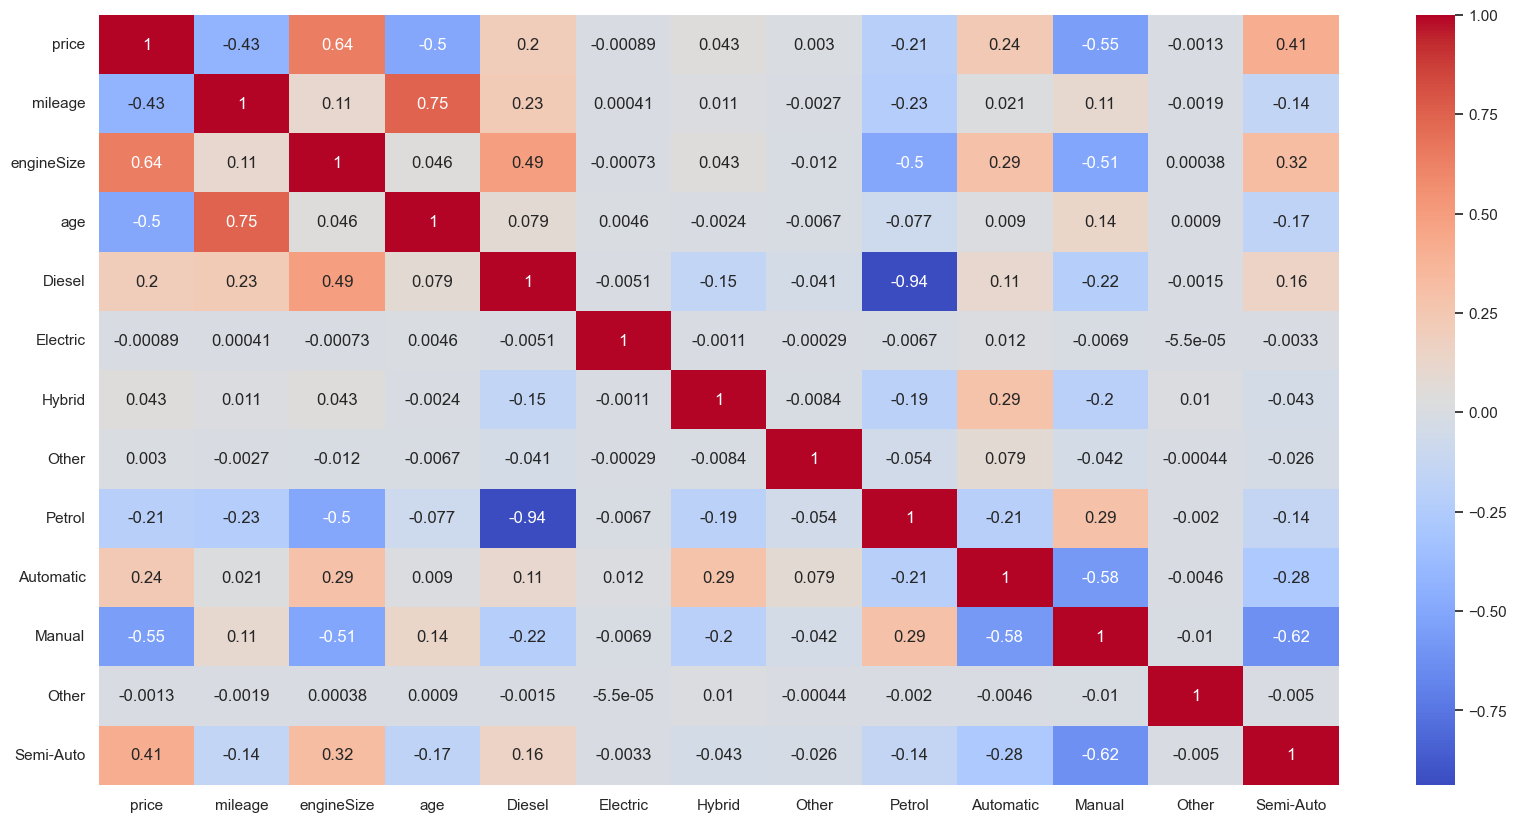

In [27]:
#Display correlation plot showing relationships between variables
sns.heatmap(cars4.corr(), annot=True, cmap='coolwarm') 
sns.set (rc = {'figure.figsize':(20, 10)})


### Price prediction using Linear Regression Model

In [30]:
#Drop Model Column
cars5 = cars4.drop(columns=['model'])

In [ ]:
#Import "train_test_split" for model prediction
#Remove price from X and Set Y value as price
#Split dataset into train and testing splits
from sklearn.model_selection import train_test_split 
 
X = cars5.drop('price', 1) 
Y = cars5.price 
X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, train_size=0.7, test_size=0.3, random_state=42) 

In [34]:
#Import linear_model and r2_score from Scikit Library.
#Create variable "lm" as instance of Linear Regression and fit predictions to model.
#Print R2_score (Performance of model based on data)
from sklearn import linear_model 
from sklearn.metrics import r2_score 

lm = linear_model.LinearRegression() 
lm.fit(X_train, y_train) 
y_pred = lm.predict(X_test) 
print(r2_score(y_true=y_test, y_pred=y_pred))

0.744248078418895


Text(0.5, 1.0, 'Pred vs Actual')

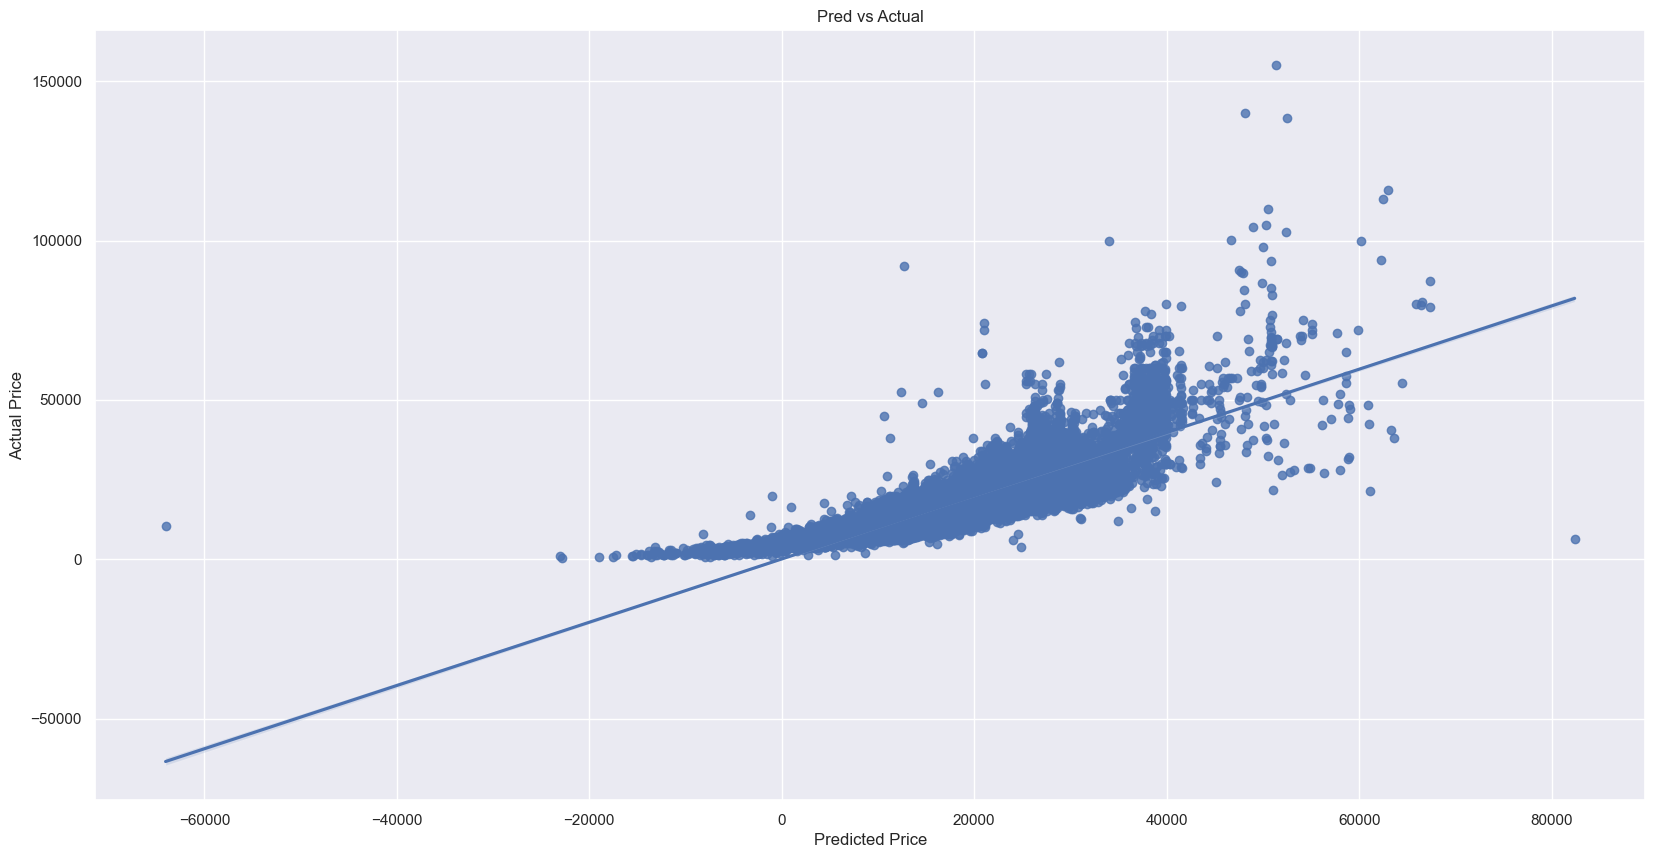

In [35]:
#Plot data and linear regression
sns.regplot(x=y_pred, y=y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Pred vs Actual')